### Improting the libraries and data set 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('../../data/Student Depression Dataset.csv')

# Step 2: Display shape and first 5 rows
print(f"Dataset Shape: {data.shape}")
data.head()


Dataset Shape: (27901, 18)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [2]:
# Colum names 
data.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [3]:
# data type of each column
data.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [4]:
# Data set information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
# no of missing values in each column
data.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [6]:
# drop the  3 rows with null values
df = data.dropna()

In [7]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27898 non-null  int64  
 1   Gender                                 27898 non-null  object 
 2   Age                                    27898 non-null  float64
 3   City                                   27898 non-null  object 
 4   Profession                             27898 non-null  object 
 5   Academic Pressure                      27898 non-null  float64
 6   Work Pressure                          27898 non-null  float64
 7   CGPA                                   27898 non-null  float64
 8   Study Satisfaction                     27898 non-null  float64
 9   Job Satisfaction                       27898 non-null  float64
 10  Sleep Duration                         27898 non-null  object 
 11  Dietary

In [9]:
#  categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

numerical_cols.remove('id')
numerical_cols.remove('Depression')

print(f"categorical colums are : {categorical_cols}")
print(f"numarical colums are : {numerical_cols}")

categorical colums are : ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
numarical colums are : ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']


In [10]:
# Traverse data frame to detect mixed data types
for column in df.columns:
    print(column,':',pd.api.types.infer_dtype(df[column]))

id : integer
Gender : string
Age : floating
City : string
Profession : string
Academic Pressure : floating
Work Pressure : floating
CGPA : floating
Study Satisfaction : floating
Job Satisfaction : floating
Sleep Duration : string
Dietary Habits : string
Degree : string
Have you ever had suicidal thoughts ? : string
Work/Study Hours : floating
Financial Stress : floating
Family History of Mental Illness : string
Depression : integer


In [11]:
##  rename long colom names

df = df.rename(columns={
    'Have you ever had suicidal thoughts ?': 'Suicidal Thoughts',
    'Family History of Mental Illness': 'Mental Illness History'
})

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()


In [12]:
# Show unique values in categorical columns
for col in df.select_dtypes(include='object'):
    print(f"{col} : {df[col].nunique()}:\n {df[col].unique()}")
    

Gender : 2:
 ['Male' 'Female']
City : 52:
 ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
Profession : 14:
 ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
Sleep Duration : 5:
 ['5-6 hours' 'Less than 5 hours' '7-8 hours' 'More than 8 hours' 'Others']
Dietary Habits : 4:
 ['Healthy' 'Moderate' 'Unhealthy' 'Others']
Degree : 28:
 ['B.Pharm' 'BSc' 'BA' 'BCA' 'M.Tech' 'PhD' 'Class 12' 'B.

In [13]:
# convert sleep duration to floating values rather string
sleep_map = {
    'less than 5 hours': 4,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'more than 8 hours': 9,
    'others': np.nan  
}
df['Sleep Duration'] = df['Sleep Duration'].str.lower().map(sleep_map)


In [14]:
# convert diatary habits to numerical values
diet_map = {'unhealthy': 0, 'moderate': 1, 'healthy': 2, 'others': np.nan}
df['Dietary Habits'] = df['Dietary Habits'].str.lower().map(diet_map)


In [15]:
# convert suicidal thoughts to numerical values
df['Suicidal Thoughts'] = df['Suicidal Thoughts'].str.lower().map({'yes': 1, 'no': 0})

In [16]:
# convert mental illness history to numerical values
df['Mental Illness History'] = df['Mental Illness History'].str.lower().map({'yes': 1, 'no': 0})

In [17]:
# clean garbage values in city colum
valid_cities = [
    'visakhapatnam', 'bangalore', 'srinagar', 'varanasi', 'jaipur', 'pune', 'thane',
    'chennai', 'nagpur', 'nashik', 'vadodara', 'kalyan', 'rajkot', 'ahmedabad',
    'kolkata', 'mumbai', 'lucknow', 'indore', 'surat', 'ludhiana', 'bhopal',
    'meerut', 'agra', 'ghaziabad', 'hyderabad', 'vasai-virar', 'kanpur', 'patna',
    'faridabad', 'delhi'
]

df['City'] = df['City'].str.lower().apply(lambda x: x if x in valid_cities else 'other')

In [18]:
# check whether missing values after cleaning
print(df.isnull().sum())

id                         0
Gender                     0
Age                        0
City                       0
Profession                 0
Academic Pressure          0
Work Pressure              0
CGPA                       0
Study Satisfaction         0
Job Satisfaction           0
Sleep Duration            18
Dietary Habits            12
Degree                     0
Suicidal Thoughts          0
Work/Study Hours           0
Financial Stress           0
Mental Illness History     0
Depression                 0
dtype: int64


In [19]:
# drop the null value rows 
df = df.dropna()

In [20]:
# check whether missing values after cleaning and dropping
print(df.isnull().sum())

id                        0
Gender                    0
Age                       0
City                      0
Profession                0
Academic Pressure         0
Work Pressure             0
CGPA                      0
Study Satisfaction        0
Job Satisfaction          0
Sleep Duration            0
Dietary Habits            0
Degree                    0
Suicidal Thoughts         0
Work/Study Hours          0
Financial Stress          0
Mental Illness History    0
Depression                0
dtype: int64


In [21]:
# check whether all numerical colums are integer or float 
print(numerical_cols)
print(df.dtypes)

['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']
id                          int64
Gender                     object
Age                       float64
City                       object
Profession                 object
Academic Pressure         float64
Work Pressure             float64
CGPA                      float64
Study Satisfaction        float64
Job Satisfaction          float64
Sleep Duration            float64
Dietary Habits            float64
Degree                     object
Suicidal Thoughts           int64
Work/Study Hours          float64
Financial Stress          float64
Mental Illness History      int64
Depression                  int64
dtype: object


In [22]:
# Traverse data frame to detect mixed data types
for column in df.columns:
    print(column,':',pd.api.types.infer_dtype(df[column]))

id : integer
Gender : string
Age : floating
City : string
Profession : string
Academic Pressure : floating
Work Pressure : floating
CGPA : floating
Study Satisfaction : floating
Job Satisfaction : floating
Sleep Duration : floating
Dietary Habits : floating
Degree : string
Suicidal Thoughts : integer
Work/Study Hours : floating
Financial Stress : floating
Mental Illness History : integer
Depression : integer


In [23]:
# summary of data
print(df.describe())

                  id           Age  Academic Pressure  Work Pressure  \
count   27868.000000  27868.000000       27868.000000   27868.000000   
mean    70450.517583     25.820942           3.141345       0.000431   
std     40647.293786      4.905716           1.381616       0.044018   
min         2.000000     18.000000           0.000000       0.000000   
25%     35051.250000     21.000000           2.000000       0.000000   
50%     70701.500000     25.000000           3.000000       0.000000   
75%    105832.250000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Sleep Duration  \
count  27868.000000        27868.000000      27868.000000    27868.000000   
mean       7.656252            2.943663          0.000682        6.338973   
std        1.470663            1.361012          0.044421        1.917552   
min        0.000000            0.000000    

In [24]:
# check for duplicate rows 
print(df.duplicated().sum())


0


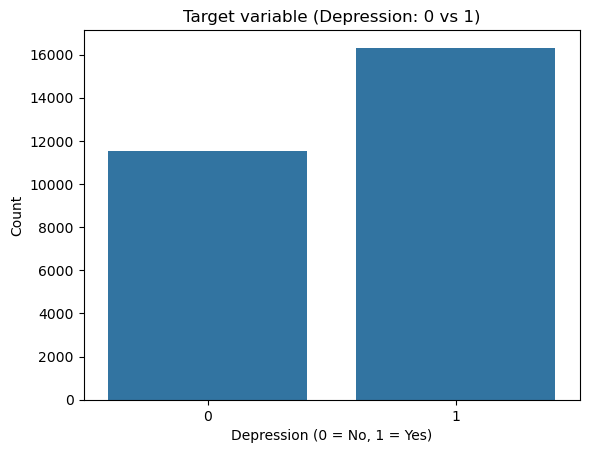

In [25]:
# see the class balanced/ or imbalnced

sns.countplot(x='Depression', data=df)
plt.title("Target variable (Depression: 0 vs 1)")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


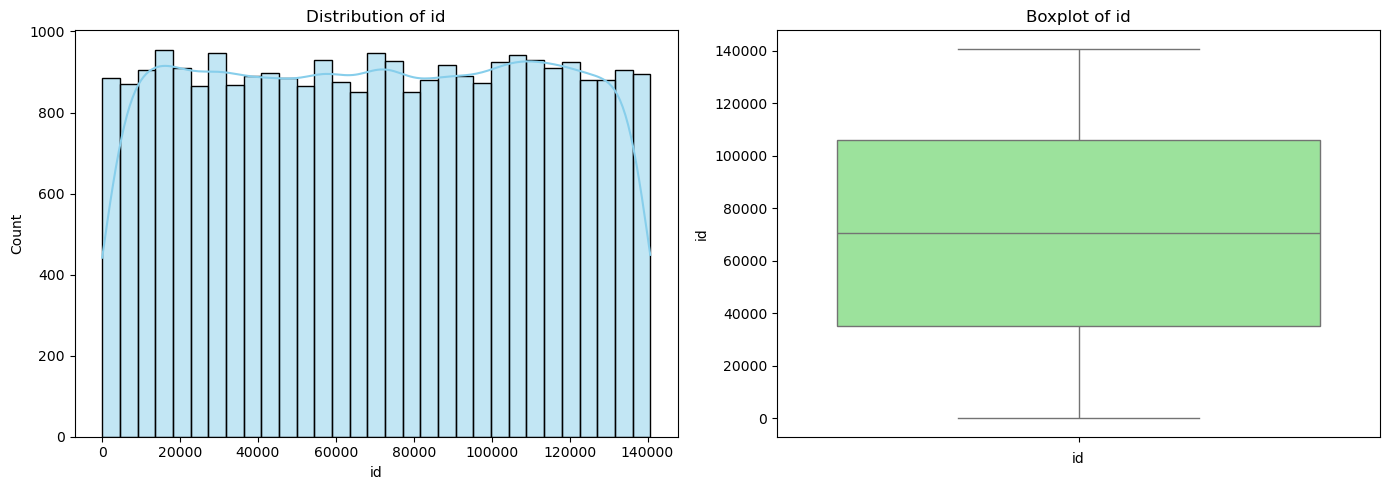

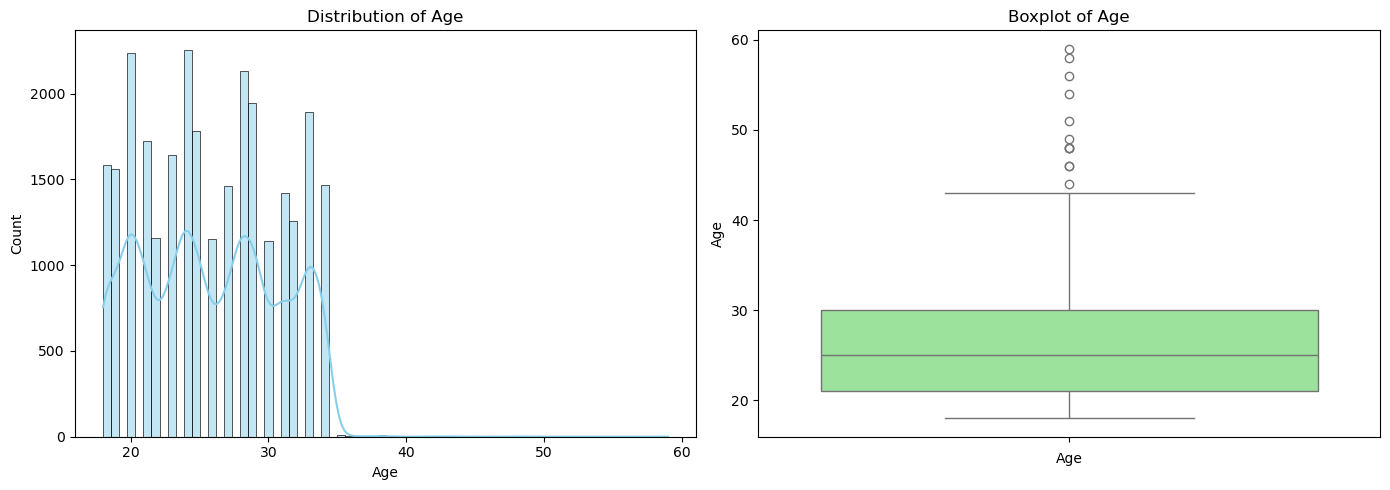

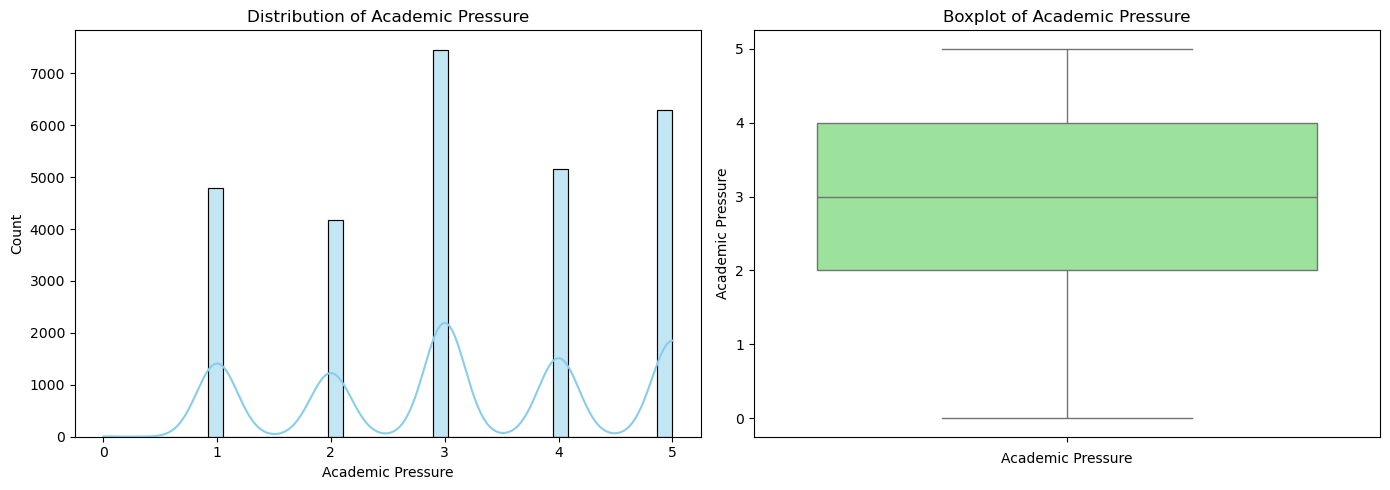

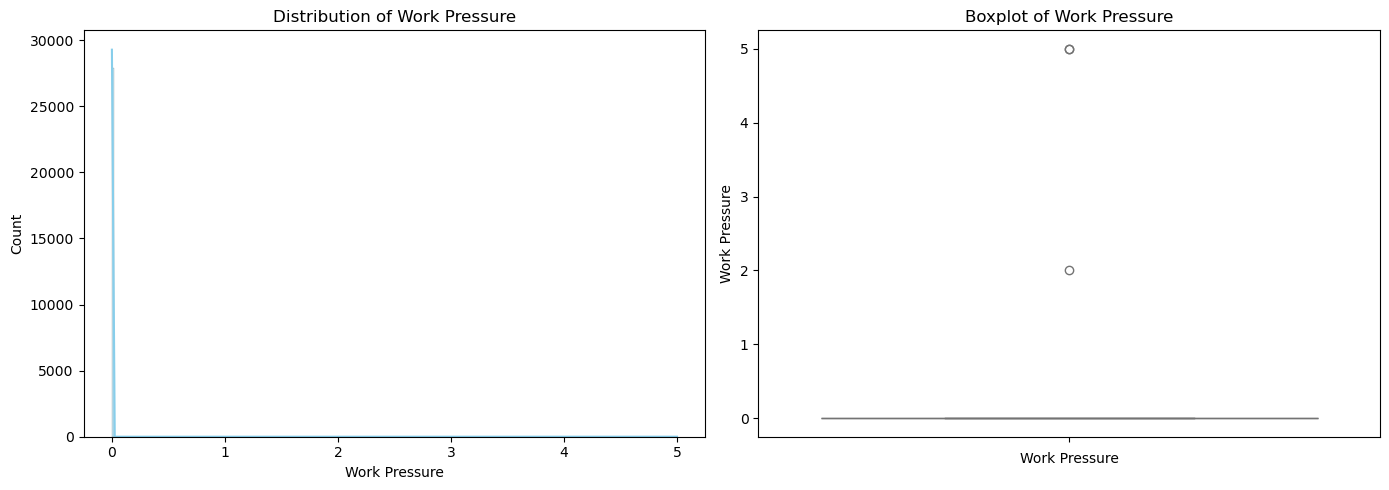

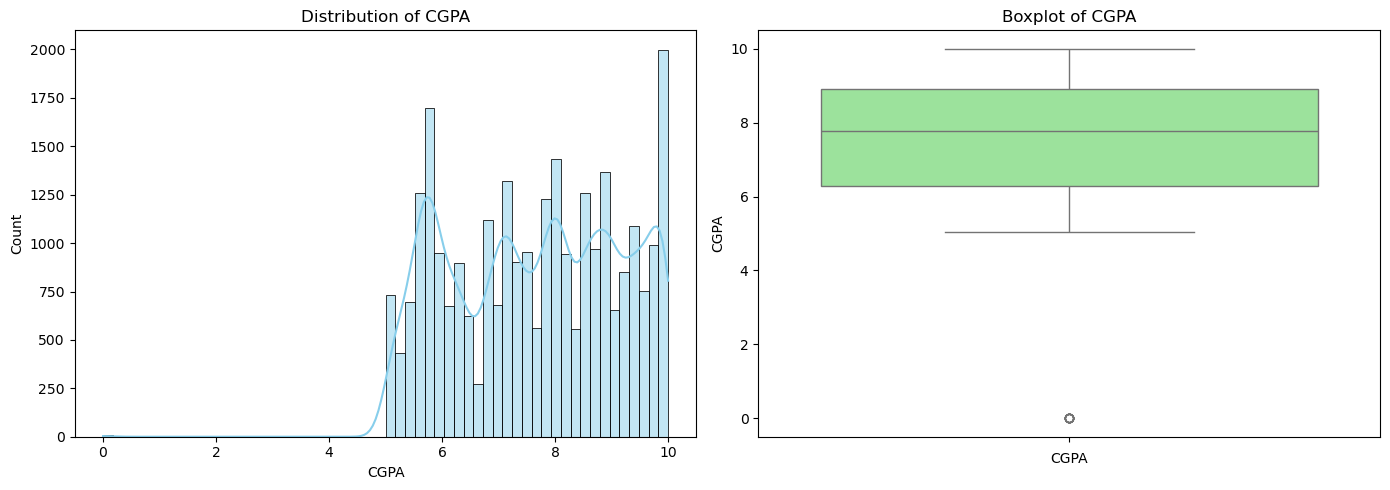

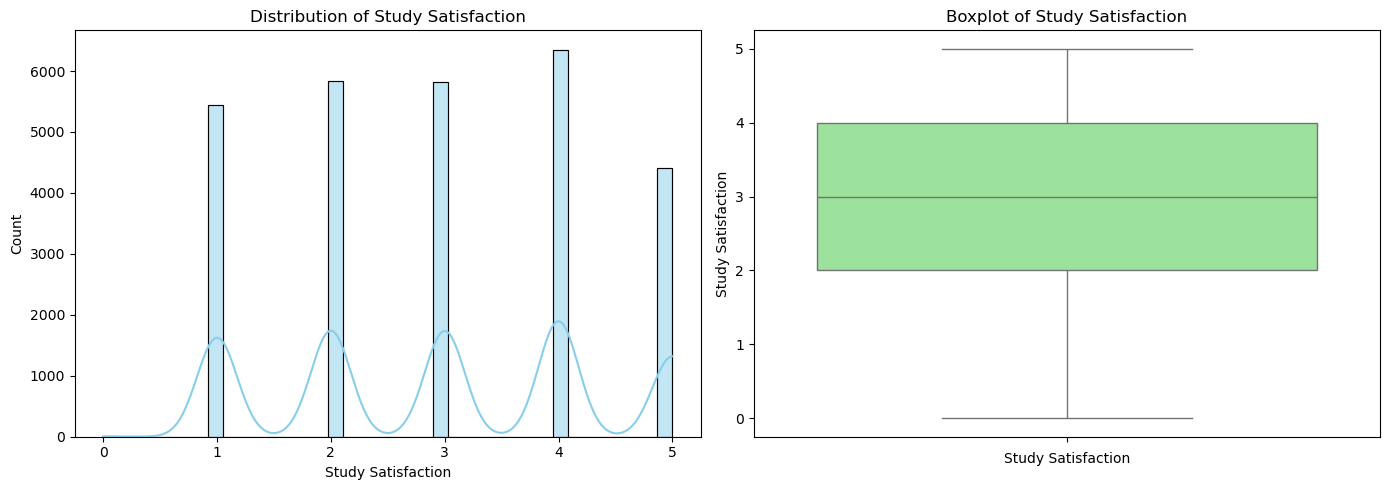

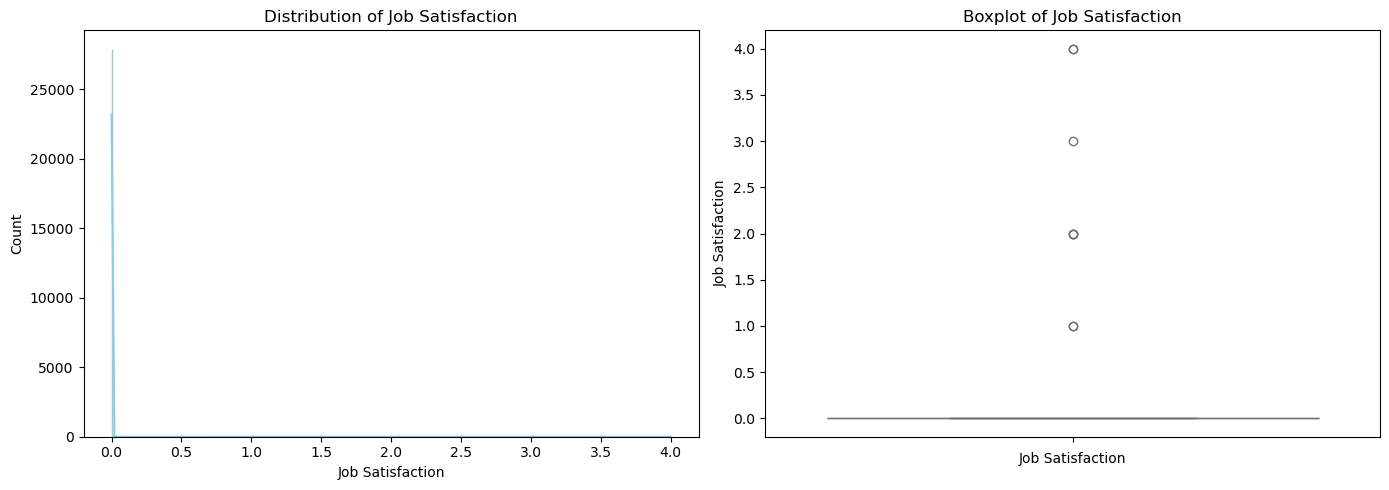

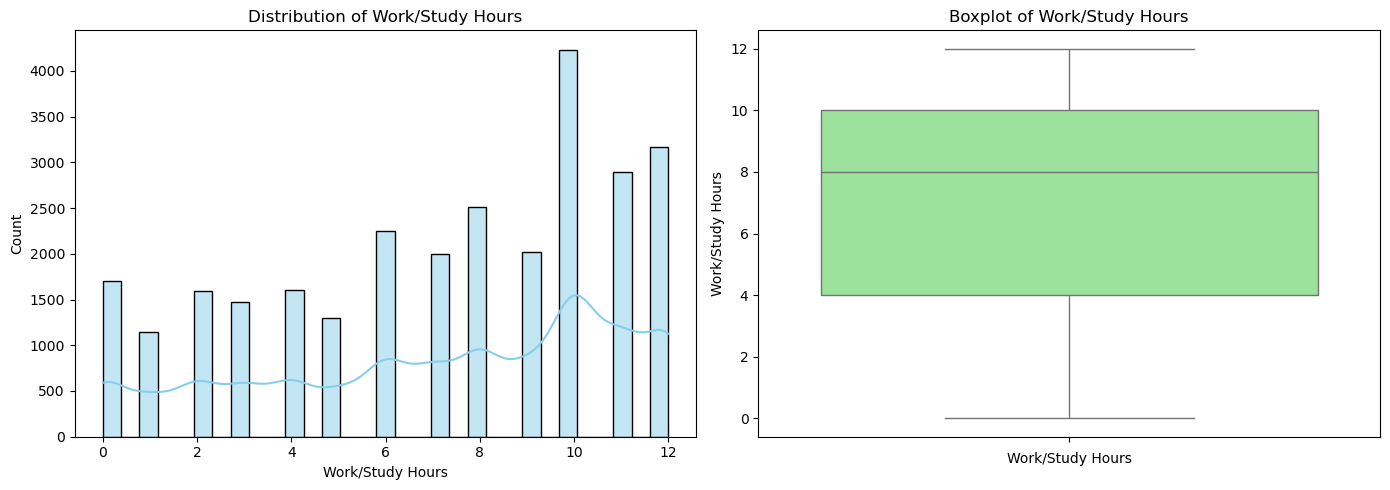

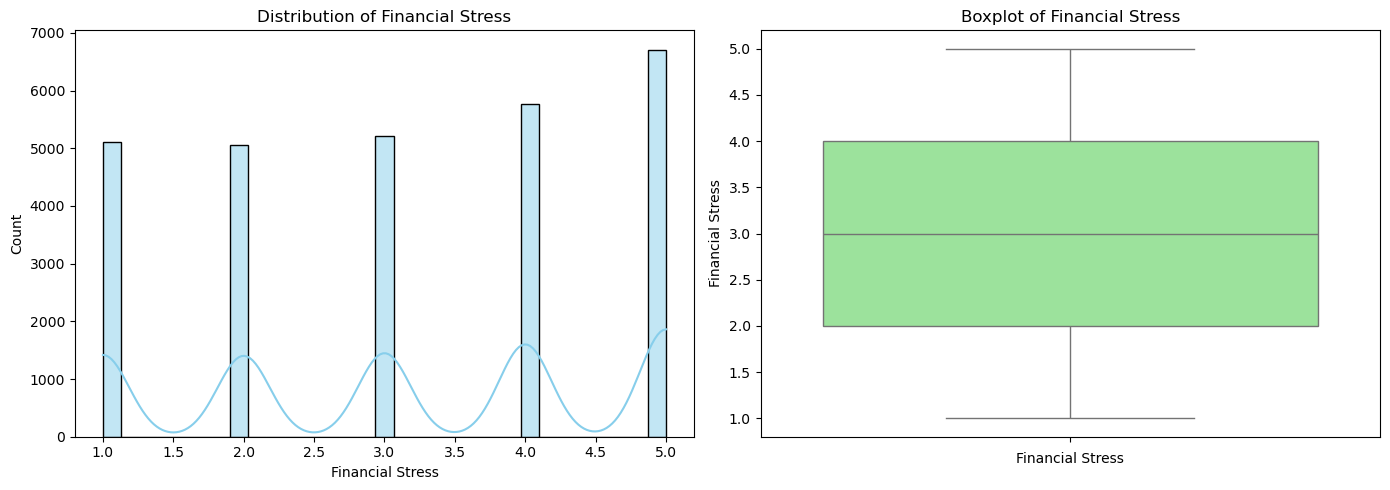

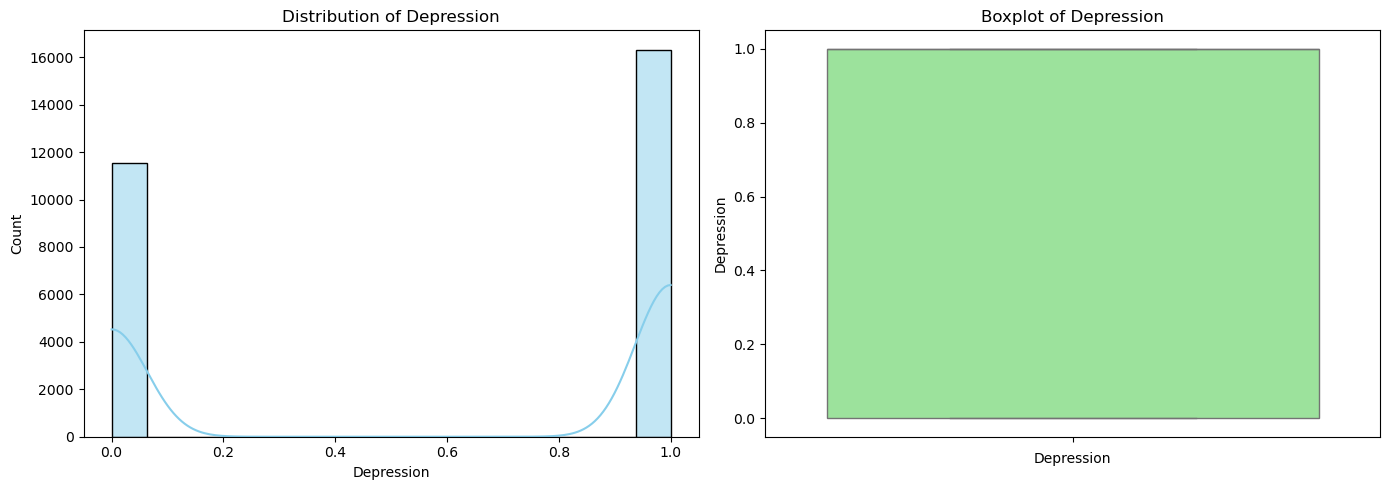

In [26]:

for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True,color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Boxplot (to detect outliers)
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


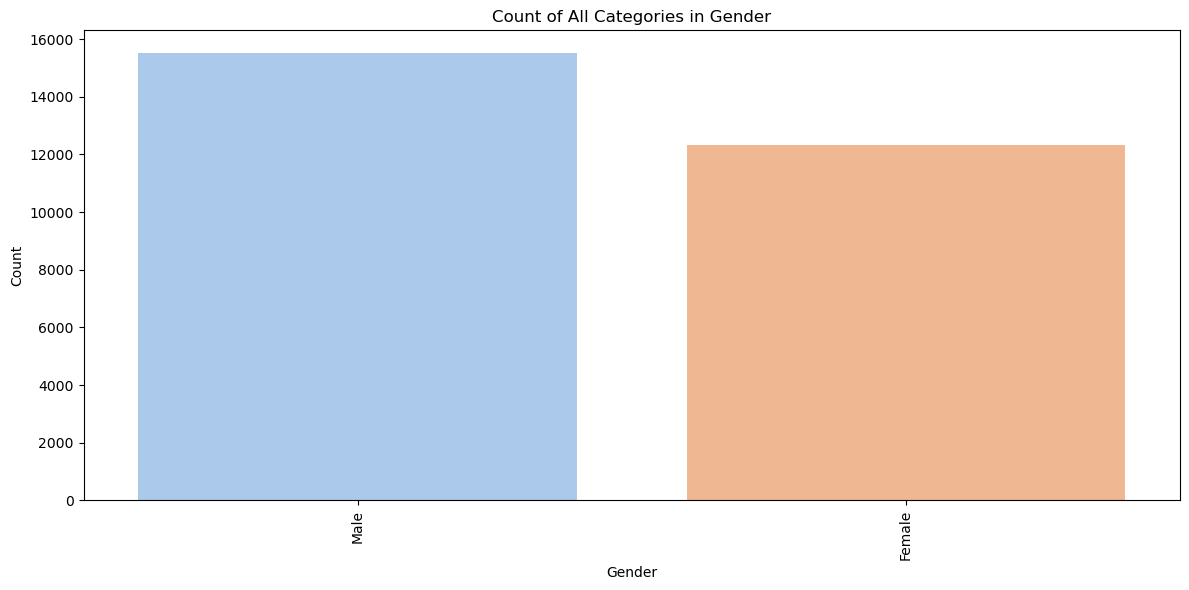

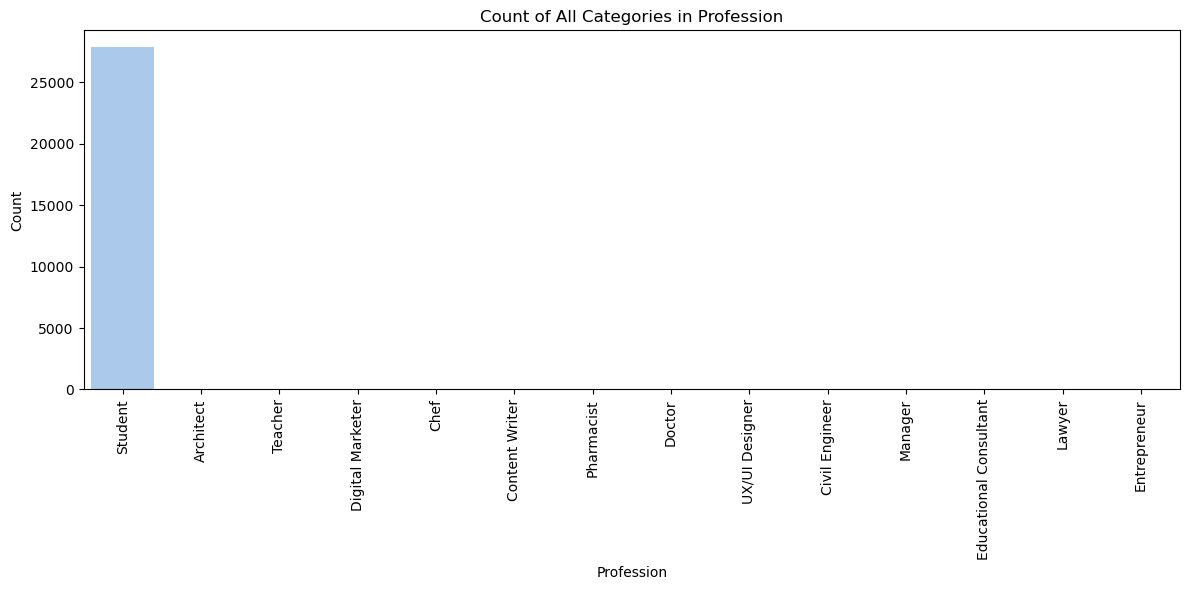

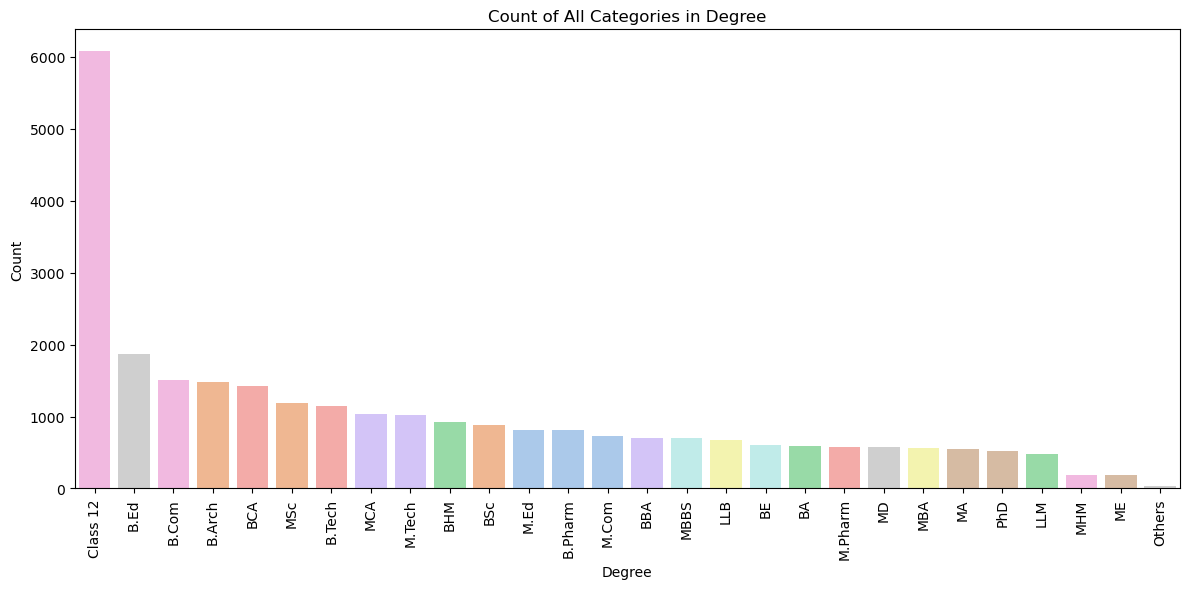

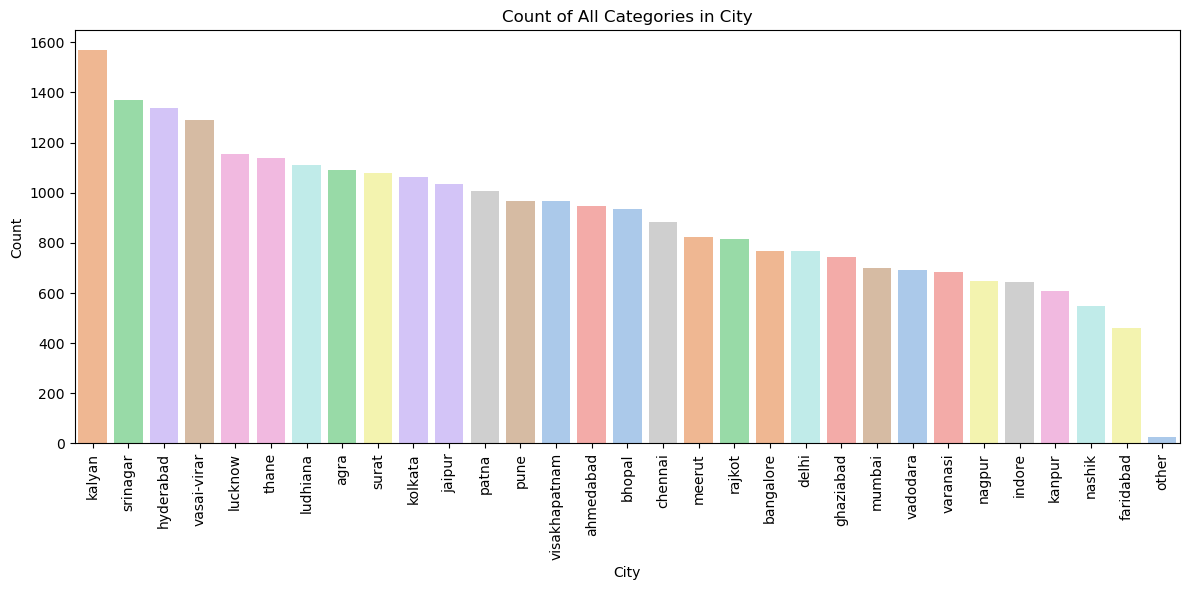

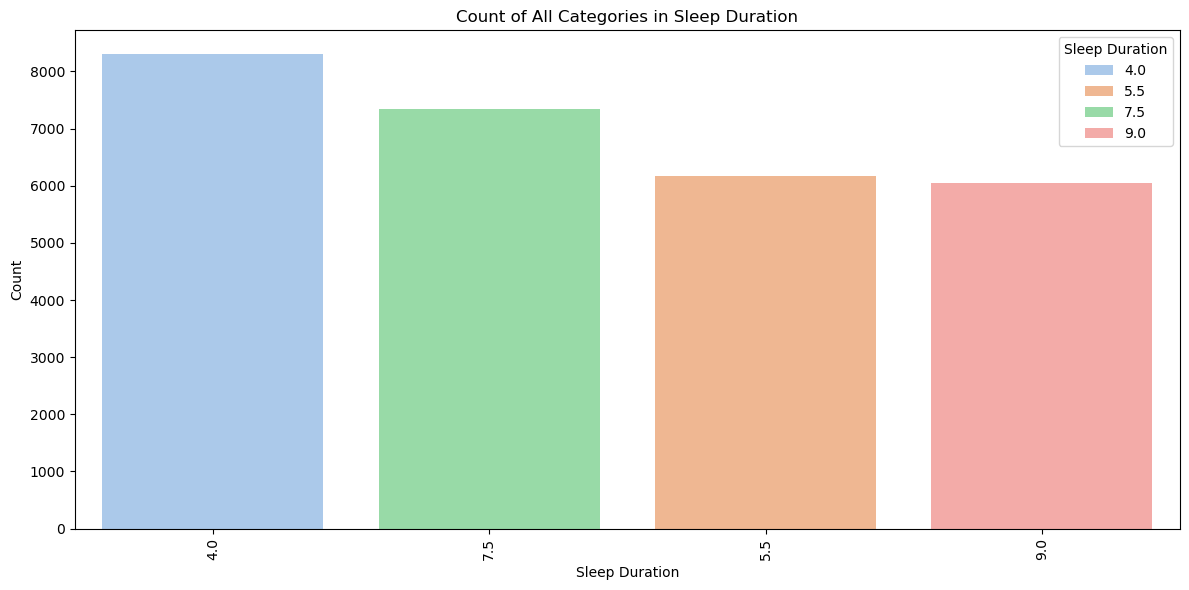

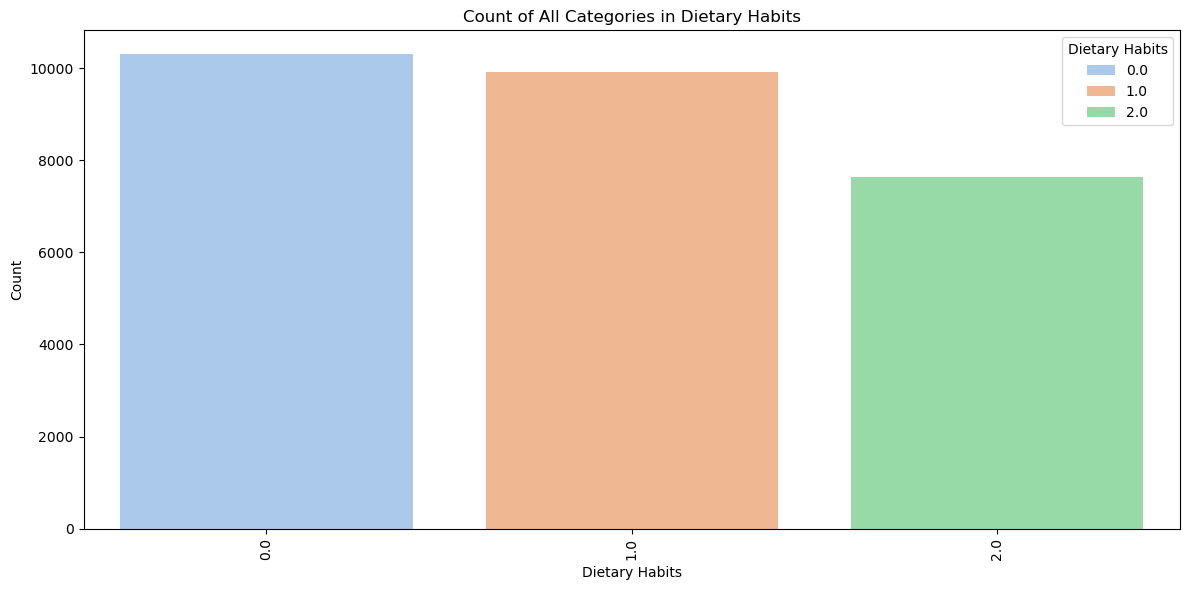

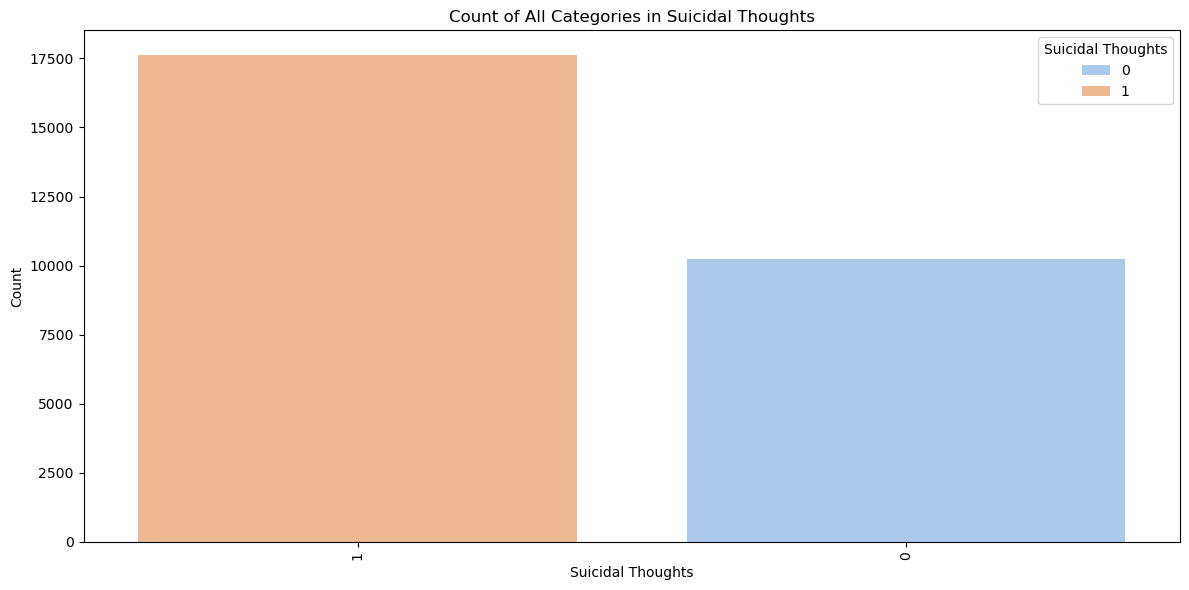

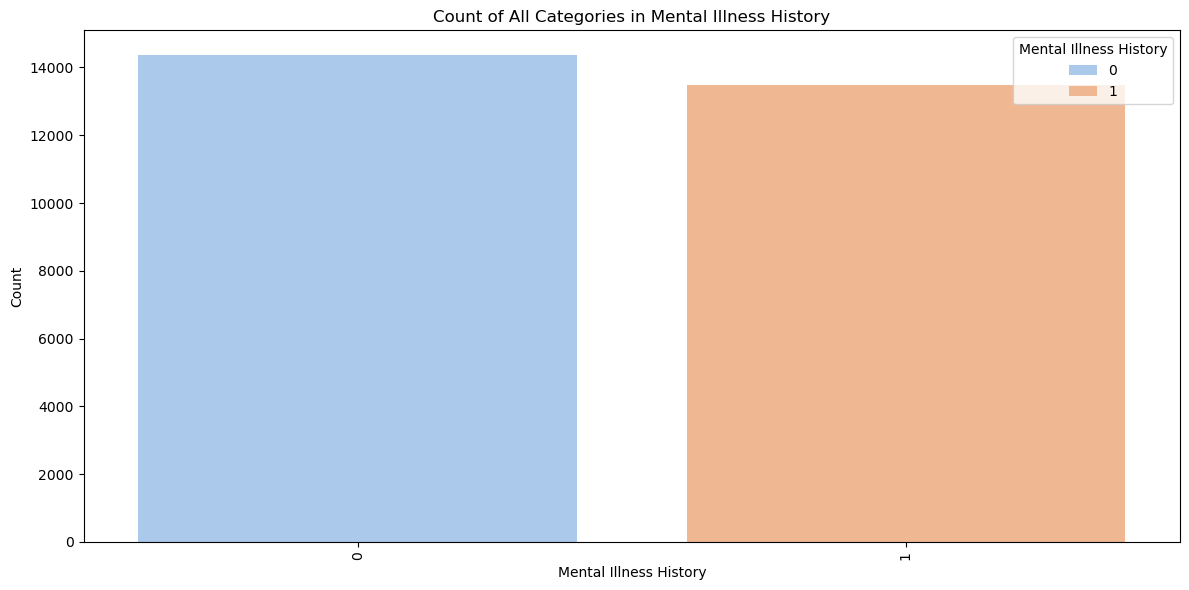

In [27]:
# plot for visualizing categorical variables
cat_cols = ['Gender', 'Profession', 'Degree', 'City', 'Sleep Duration',
            'Dietary Habits', 'Suicidal Thoughts', 'Mental Illness History']
for col in cat_cols:
    plt.figure(figsize=(12,6)) 

    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='pastel',hue=col)

    plt.title(f'Count of All Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


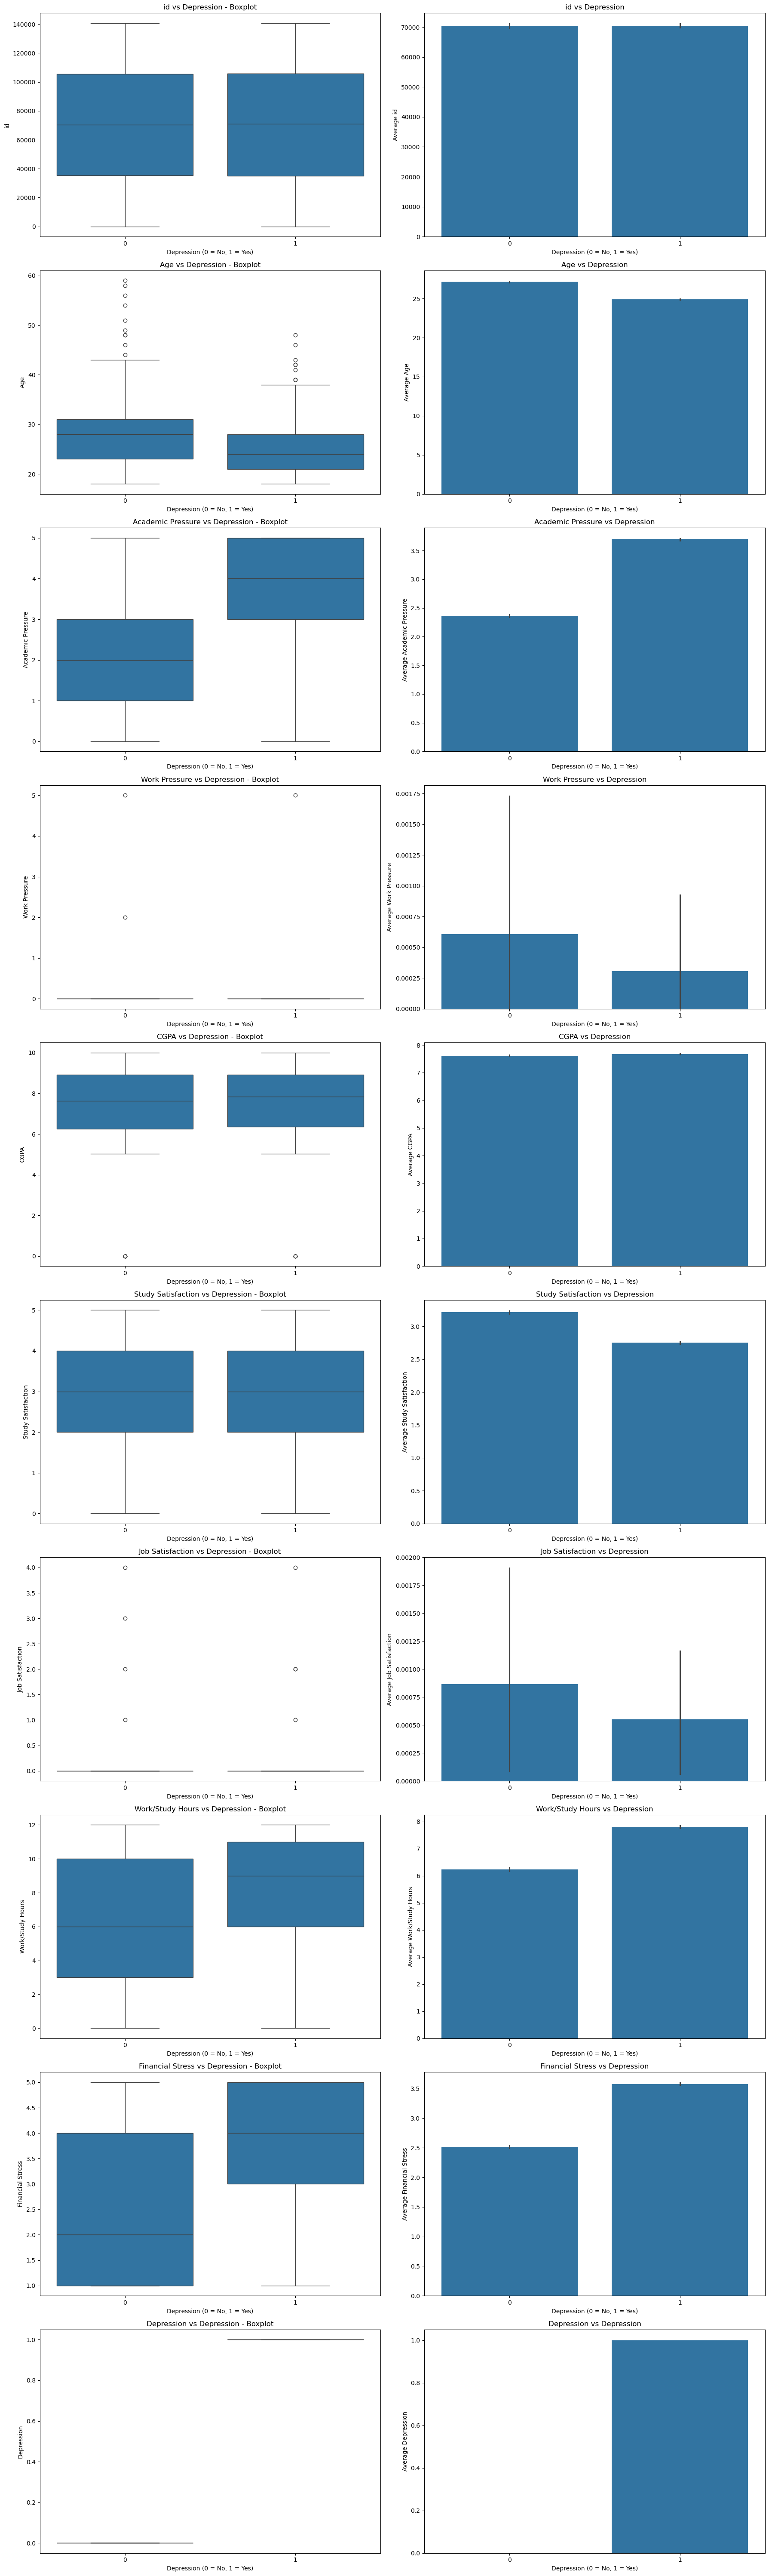

In [28]:

## analyze the relationship between depression and numarical variables
plt.figure(figsize=(18, 60))  # Double height for side-by-side plots

for i, col in enumerate(numerical_cols, 1):

    plt.subplot(len(numerical_cols), 2, 2 * i - 1)
    sns.boxplot(x='Depression', y=col, data=df)
    plt.title(f'{col} vs Depression - Boxplot')
    plt.xlabel('Depression (0 = No, 1 = Yes)')
    plt.ylabel(col)

    plt.subplot(len(numerical_cols), 2, 2 * i)
    sns.barplot(x='Depression', y=col, data=df)
    plt.title(f'{col} vs Depression')
    plt.xlabel('Depression (0 = No, 1 = Yes)')
    plt.ylabel(f'Average {col}')

plt.tight_layout()
plt.show()


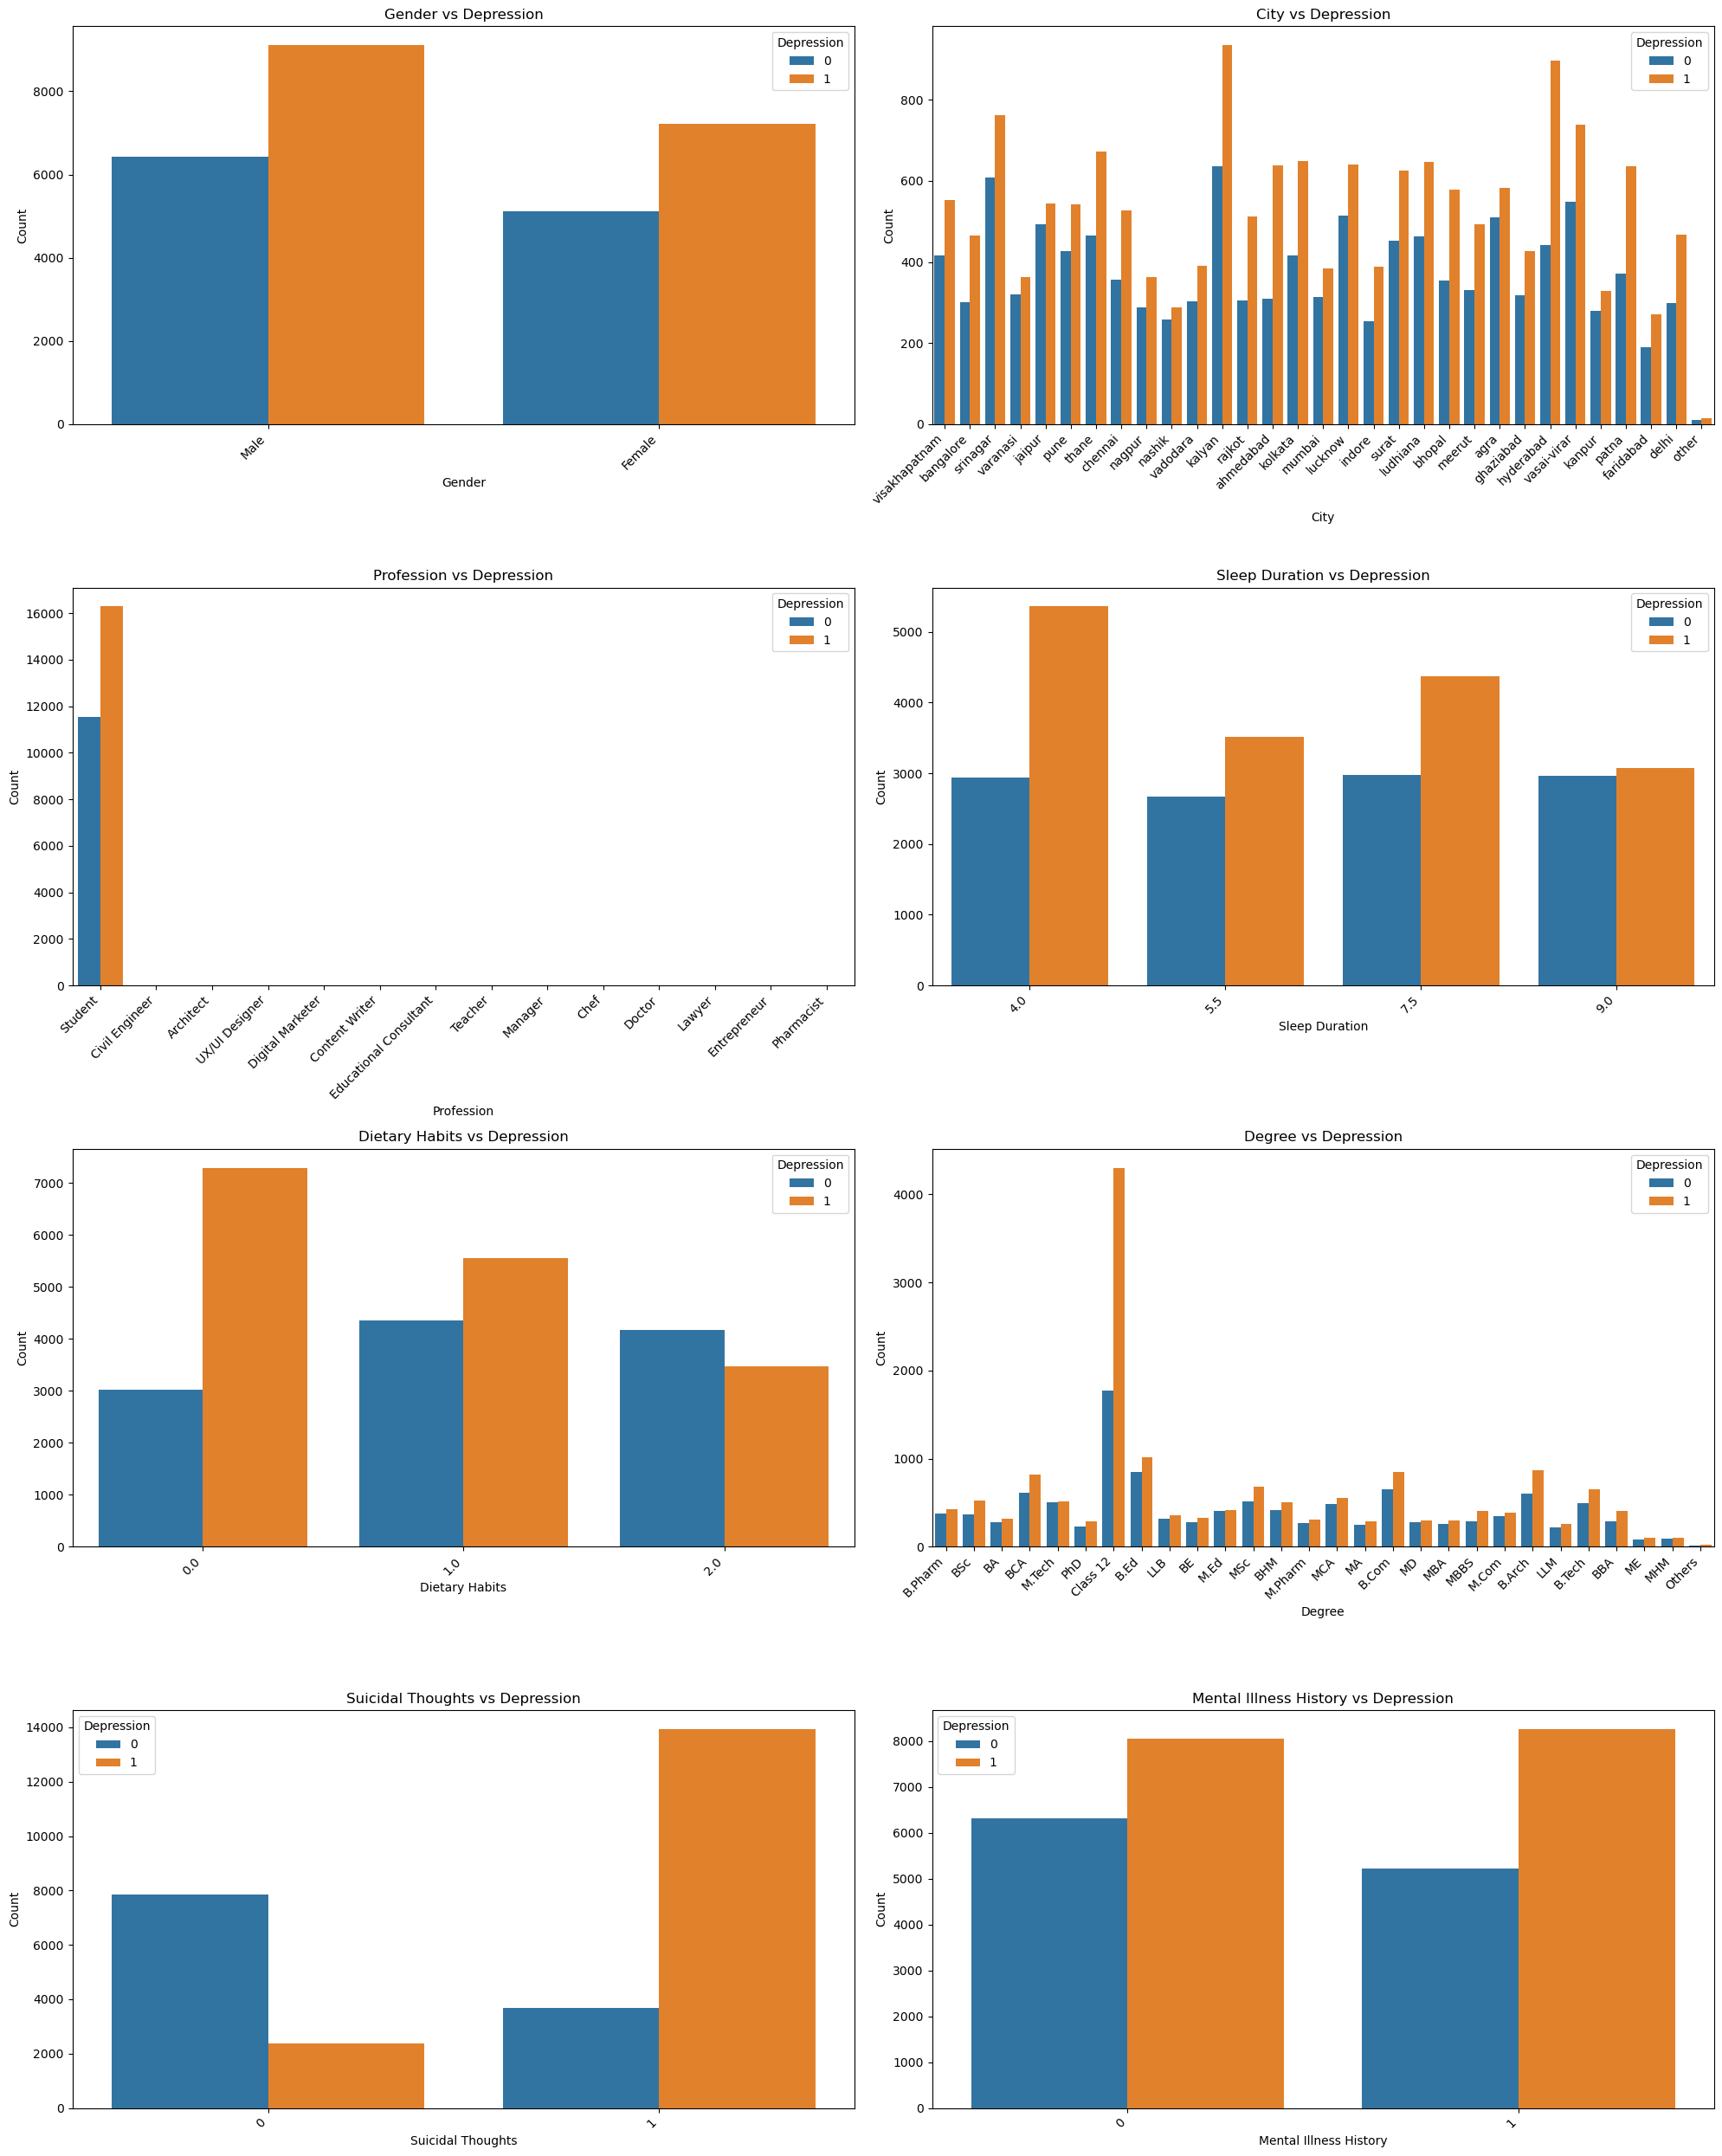

In [29]:
## analyze the relationship between depression and categorical variables

plt.figure(figsize=(20, 25))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 2, i)
    sns.countplot(data=df, x=col, hue='Depression')
    plt.title(f'{col} vs Depression')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


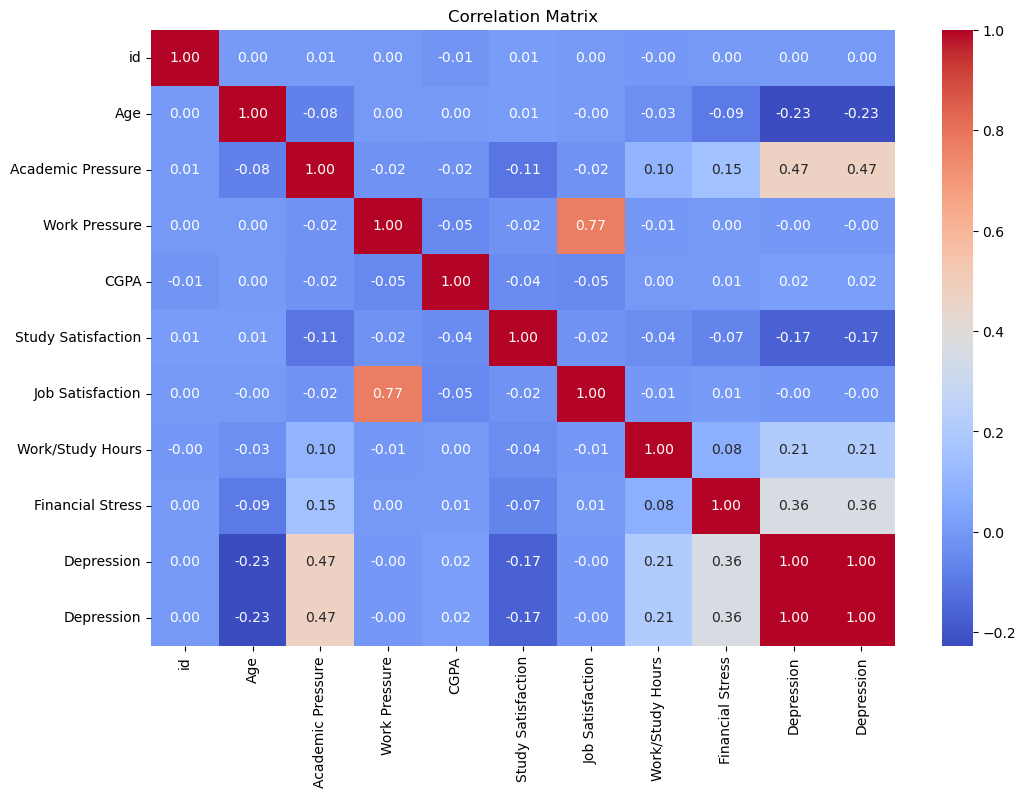

In [30]:
# correlation heatmap

plt.figure(figsize=(12, 8))
corr = df[numerical_cols + ['Depression']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
